In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (10, 10
                                 )
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
import numpy as np
import os
from google.colab import files

uploaded=files.upload()

filenames = uploaded.keys()

for file in filenames:
    pic = file

Saving 195023_mayankbhardwaj_1603032331164_581.jpeg to 195023_mayankbhardwaj_1603032331164_581.jpeg


In [ ]:
image = get_image(pic)
number_of_colors = 7
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7f6674ba3cd0>,
 [Text(0.6644219691773776, 0.876666097710215, '#84181b'),
  Text(-0.8168372086565525, 0.736733991718973, '#f1d07f'),
  Text(-1.0990664956008018, 0.04530825805273308, '#430f0d'),
  Text(-0.9171153453592557, -0.6073709272813225, '#f8f1cd'),
  Text(-0.2956364185487237, -1.059527775958556, '#c37248'),
  Text(0.13161858755840067, -1.0920973159060194, '#42552c'),
  Text(0.8836507099301324, -0.6551041312951501, '#79715a')])

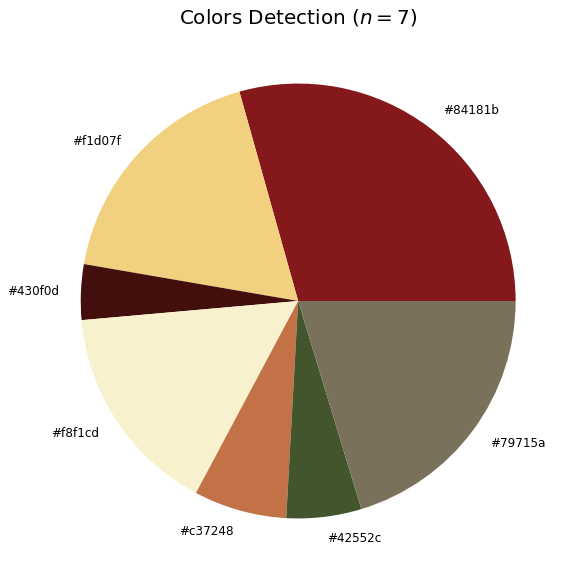

In [ ]:
plt.title('Colors Detection ($n=7$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [ ]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

In [ ]:
def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

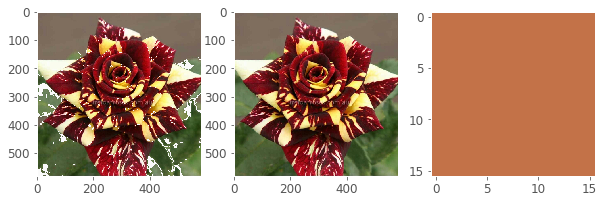

In [ ]:
show_color(4)

In [ ]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [ ]:
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10)
    w = int(inp_img.shape[1])
    step_w = int(w/10)
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [ ]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)


In [ ]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


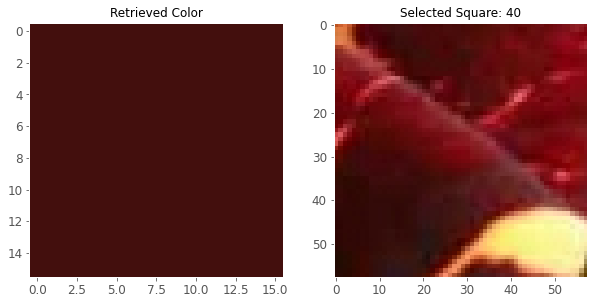

In [ ]:
best_color_plot(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


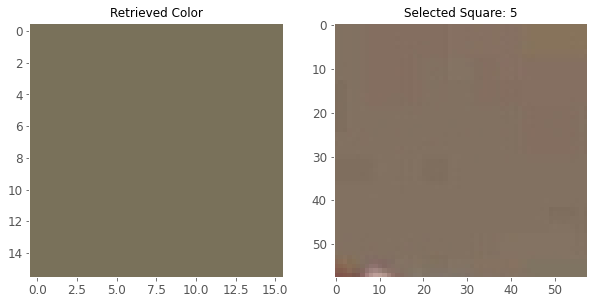

In [ ]:
best_color_plot(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


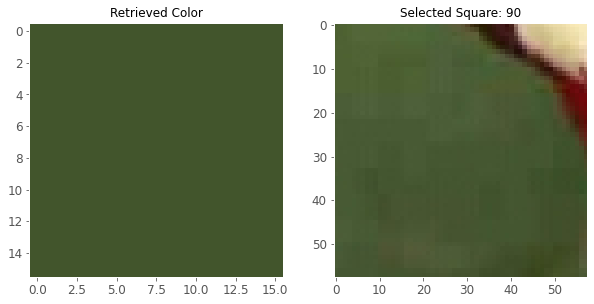

In [ ]:
best_color_plot(90)

In [ ]:
colors_dict2 = { "C71585":"MediumVRPink","FF1493":"DeepPink","DB7093":"PaleVRPink","FF69B4":"HotPink","FFB6C1":"LightPink","FFC0CB":"Pink","FFE4E1":"MistyRoseWhite","FAEBD7":"AntiqueWhite","FAF0E6":"LinenWhite","F5F5DC":"BeigeWhite","F5F5F5":"WhiteSmoke","FFF0F5":"LavenderBlushWhite","FDF5E6":"OldLaceWhite","F0F8FF":"AliceBWhite","FFF5EE":"SeashellWhite","F8F8FF":"GhostWhite","F0FFF0":"HoneydewWhite","FFFAF0":"FloralWhite","F0FFFF":"AzureWhite","F5FFFA":"MintCreamWhite","FFFAFA":"SnowWhite","FFFFF0":"IvoryWhite","FFFFFF":"White","696969":"DimGrayWhite","708090":"SlateGrayWhite","808080":"GrayWhite","A9A9A9":"DarkGrayWhite","C0C0C0":"SilverWhite","808080":"GrayWhite","D3D3D3":"LightGrayWhite","DCDCDC":"GainsboroWhite","4B0082":"IndigoViolate","800080":"PurpleViolate","8B008B":"DarkMagentaViolate","9400D3":"DarkViolet","483D8B":"DarkSlateBViolate","8A2BE2":"BViolet","9932CC":"DarkOrchidViolate","FF00FF":"FuchsiaViolate","FF00FF":"MagentaViolate","6A5ACD":"SlateBViolate","7B68EE":"MediumSlateBViolate","BA55D3":"MediumOrchidViolet","9370DB":"MediumPurpleViolate","DA70D6":"OrchidViolet","EE82EE":"Violate","DDA0DD":"PlumViolate","BA55D3":"MediumOrchidViolet","9370DB":"MediumPurpleViolate","DA70D6":"OrchidViolet","EE82EE":"Violate","DDA0DD":"PlumViolate","D8BFD8":"ThistleViolate","E6E6FA":"LavenderViolate","8B0000":"DarkRed","FF0000":"Red","B22222":"FirebrickRed","DC143C":"CrimsonRed","CD5C5C":"IndianRed","F08080":"LightCoralRed","FA8072":"SalmonRed","E9967A":"DarkSalmonRed","FFA07A":"LightSalmonRed","BDB76B":"DarkKhakiYellow","FFD700":"GoldYellow","F0E68C":"KhakiYellow","FFDAB9":"PeachPuffYellow","FFFF00":"Yellow","EEE8AA":"PaleGoldenrodYellow","FFE4B5":"MoccasinYellow","FFEFD5":"PapayaWhipYellow","FAFAD2":"LightGoldenrodYellow","FFFACD":"LemonChiffonYellow","FFFFE0":"LightYellow","FF4500":"OrangeR","FF6347":"TomatoOrange","FF8C00":"DarkOrange","FF7F50":"CoralOrange","FFA500":"Orange",}

In [ ]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [ ]:
summary_df = build_summary()
summary_df.style \
  .highlight_null('lightgray') \
  .highlight_max(color='lightgreen') \
  .highlight_min(color='pink')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


,Square Number,#84181b,#f1d07f,#430f0d,#f8f1cd,#c37248,#42552c,#79715a
0,0,12.436929,20.528176,18.004936,29.981206,8.073149,9.993894,0.981710
1,1,12.727729,19.929991,18.605883,29.383699,7.771530,10.594267,0.986901
2,2,12.671441,19.726800,18.821789,29.183627,7.690545,10.807530,1.098268
3,3,12.450390,19.200358,18.326555,27.955833,8.153800,11.114395,2.798668
4,4,13.336682,17.710393,19.479412,25.864535,7.986352,12.210049,3.412578
5,5,12.819353,18.898348,19.616500,28.342095,7.274915,11.610247,1.438542
6,6,12.850318,19.244420,19.293483,28.698625,7.429951,11.281445,1.201758
7,7,12.980164,19.662093,18.782754,29.093469,7.762819,10.790062,0.928640
8,8,12.814910,19.669520,18.917892,29.135870,7.601874,10.895561,0.964373
9,9,12.943730,19.924856,18.562273,29.366606,7.862122,10.560791,0.779621


In [ ]:
summary_df.head()

,Square Number,#84181b,#f1d07f,#430f0d,#f8f1cd,#c37248,#42552c,#79715a
0,0,12.436929,20.528176,18.004936,29.981206,8.073149,9.993894,0.981710
1,1,12.727729,19.929991,18.605883,29.383699,7.771530,10.594267,0.986901
2,2,12.671441,19.726800,18.821789,29.183627,7.690545,10.807530,1.098268
3,3,12.450390,19.200358,18.326555,27.955833,8.153800,11.114395,2.798668
4,4,13.336682,17.710393,19.479412,25.864535,7.986352,12.210049,3.412578


In [ ]:
pd.DataFrame([summary_df.max()])

,Square Number,#84181b,#f1d07f,#430f0d,#f8f1cd,#c37248,#42552c,#79715a
0,120.0,20.239464,25.997608,23.724295,34.026694,15.653118,19.516126,14.364681


### **Received Colors**

In [ ]:
data = pd.DataFrame([summary_df.max().iloc[0:]], index = None)
colours = list(data.columns[1:])
newlst=[]
for i in colours:
    newlst.append(i[1:])
print(newlst)

['84181b', 'f1d07f', '430f0d', 'f8f1cd', 'c37248', '42552c', '79715a']


###**HEX CODE TO DEFINE THE COLOR**

In [ ]:
colorof = colors_dict2

def get_color_name(hx):
    # if color is found in dict
    if colorof.__contains__(hx):return colorof[hx]

    # else return its closest available color
    m = 16777215
    k = '000000'
    for key in colorof.keys():
        a = int(hx[:2],16)-int(key[:2],16)
        b = int(hx[2:4],16)-int(key[2:4],16)
        c = int(hx[4:],16)-int(key[4:],16)

        v = a*a+b*b+c*c # simple measure for distance between colors

        # v = (r1 - r2)^2 + (g1 - g2)^2 + (b1 - b2)^2

        if v <= m:
            m = v
            k = key

    return colorof[k]
#hx = input('Enter The Hex of Color:')
l = []
for i in newlst:
  hx = str(i)
  result = str(get_color_name(hx))
  l.append(result)
for x in l:
    if l.count(x) > 1:
        l.remove(x)
print(l)

['KhakiYellow', 'DarkRed', 'LightGoldenrodYellow', 'IndianRed', 'DimGrayWhite']




```
# This is formatted as code
```

###**Check With Acquried Colors**

In [ ]:
import difflib
all = ['Red','Yellow','White','Pink']
acquired_colors = []
for p in l:
  a = difflib.get_close_matches(p,all,cutoff=.45)
  for i in a:
    acquired_colors.append(i)
for x in acquired_colors:
    if acquired_colors.count(x) > 1:
        acquired_colors.remove(x)
print(acquired_colors)

['Yellow', 'Red', 'White']


###***Final Part***

In [ ]:
acquired_colors.sort()

R1 = ['Red','Yellow'] #Primary Colors of Avrocrado Rose
R2 = ['White','Pink'] #Primary Colors of Neil Diamond Rose
R3 = ['White','Red'] #Primary Colors of Double Delight Rose
R4 = ['White','Yellow'] #Primary Colors of Graham Thomas Rose

R1.sort()
R2.sort()
R3.sort()
R4.sort()

if acquired_colors == R1:
  print("Avrocrado")
elif acquired_colors == R2:
  print("Neil Diamond")
elif acquired_colors == R3:
  print("Double Delight")
elif acquired_colors == R4:
  print("Graham Thomas")